#Assignment 3

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [6]:
data = pd.read_csv('Housing.csv')

In [8]:
print(data.describe())


              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


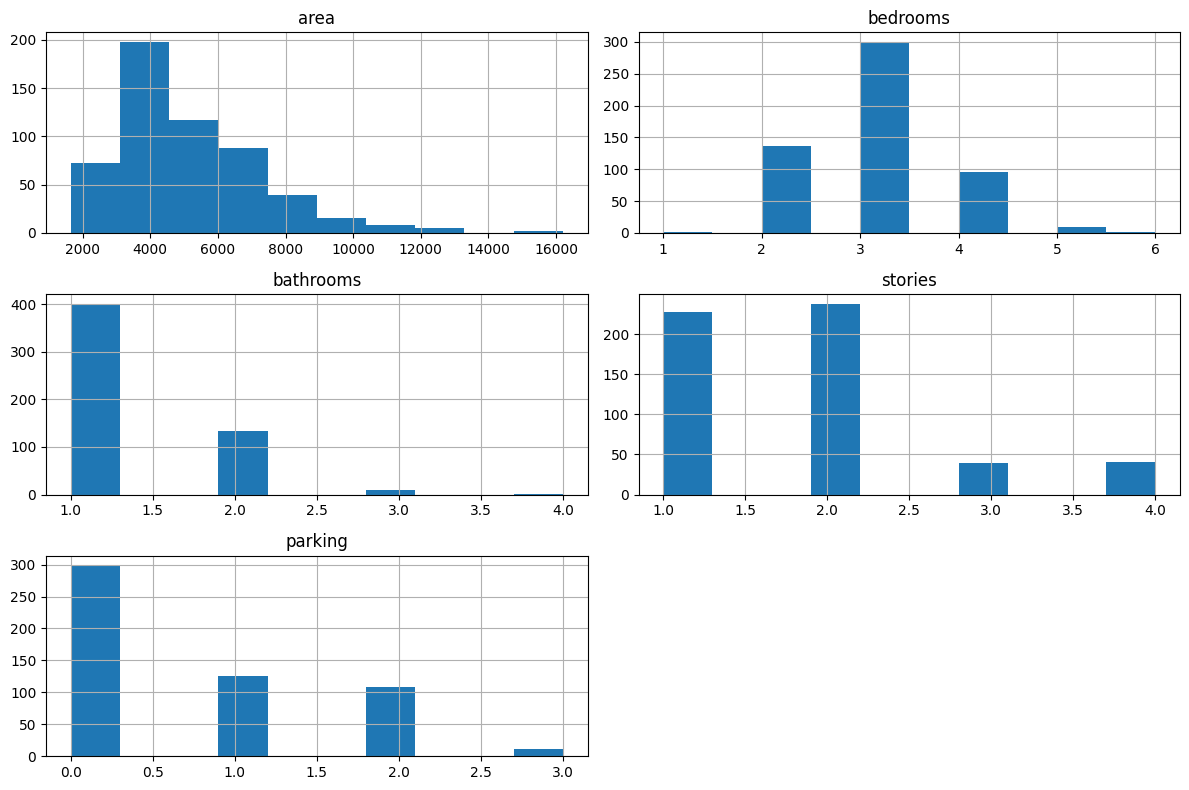

In [15]:
# Univariate Analysis
# Plot histograms of numerical variables
numerical_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data[numerical_vars].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

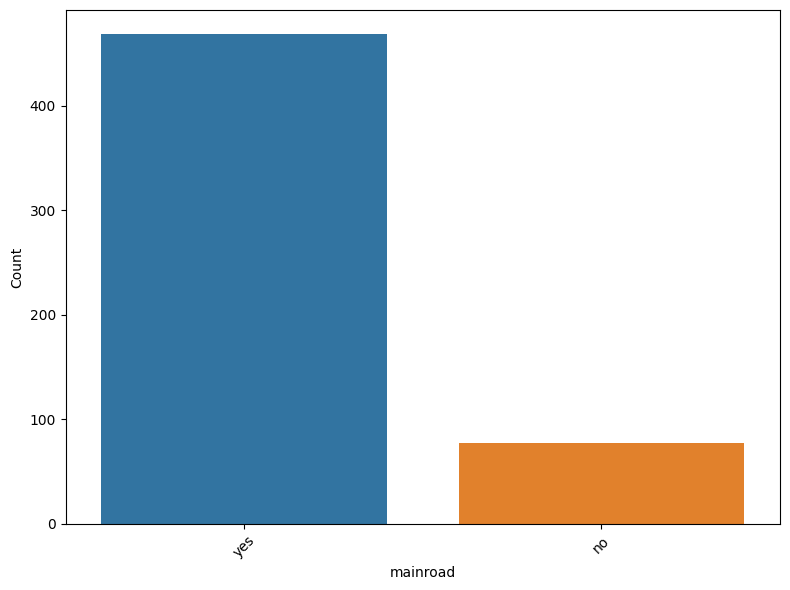

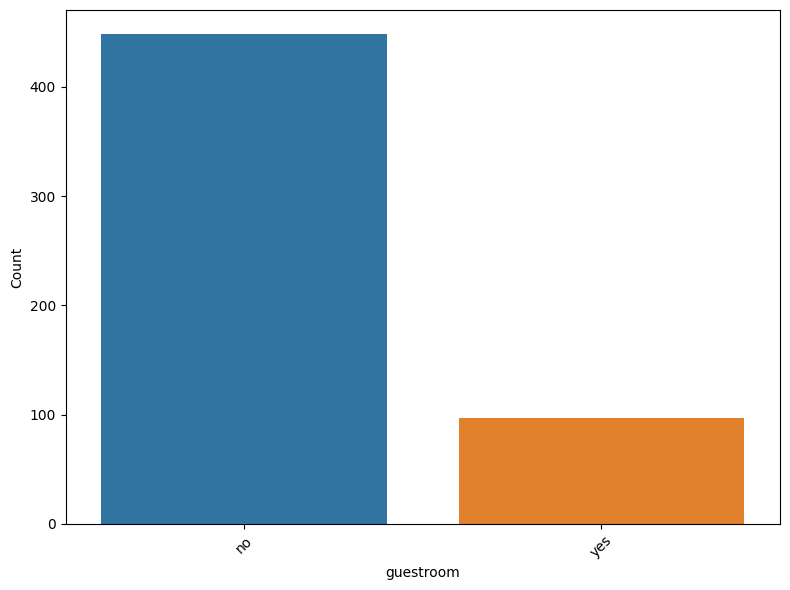

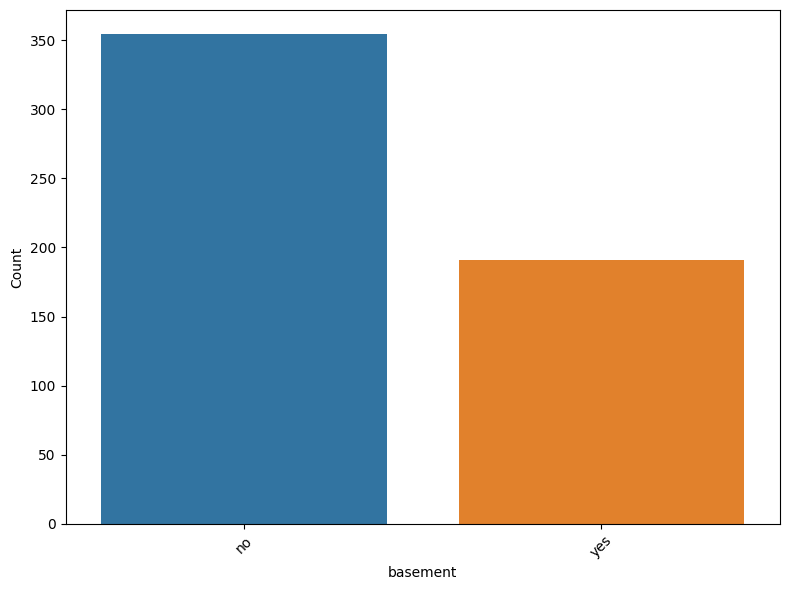

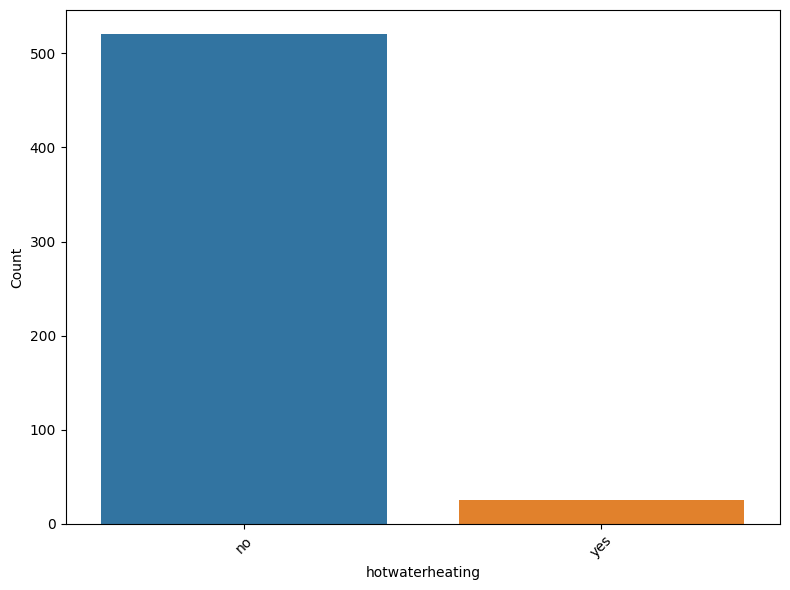

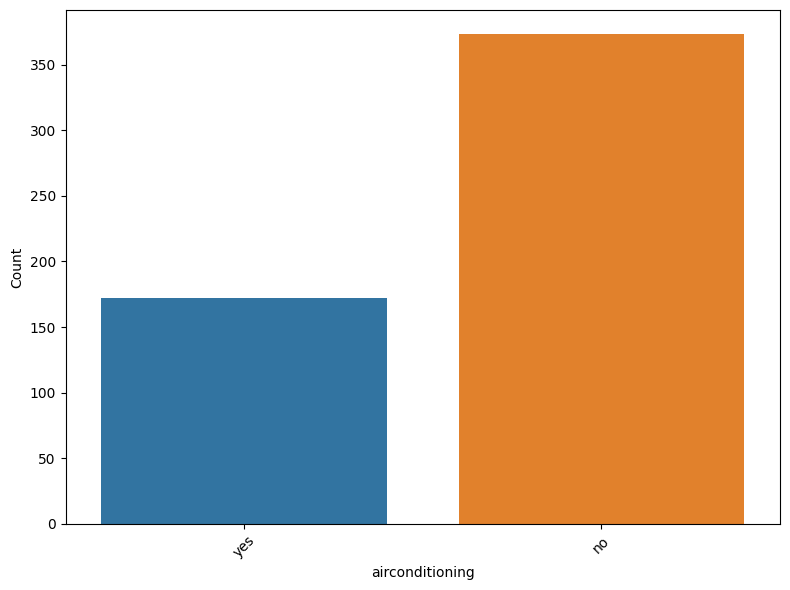

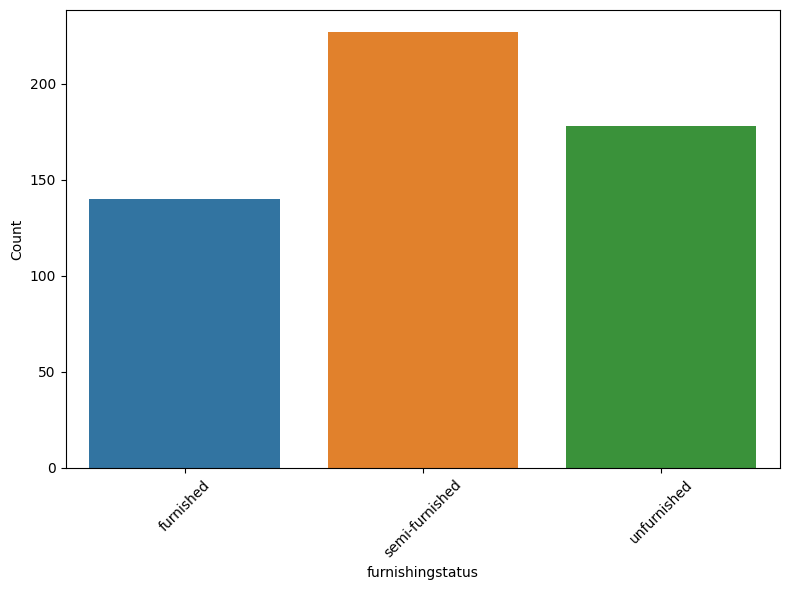

In [21]:
# Plot bar plots of categorical variables
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=data)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


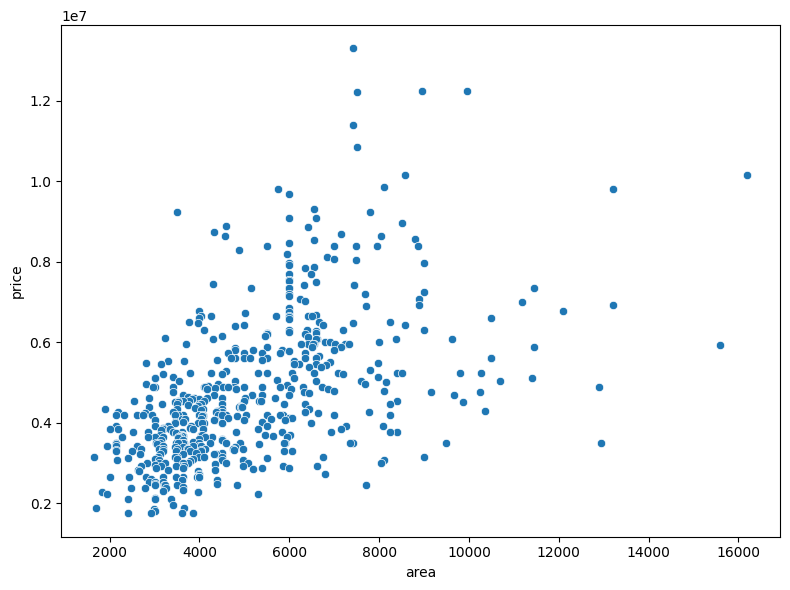

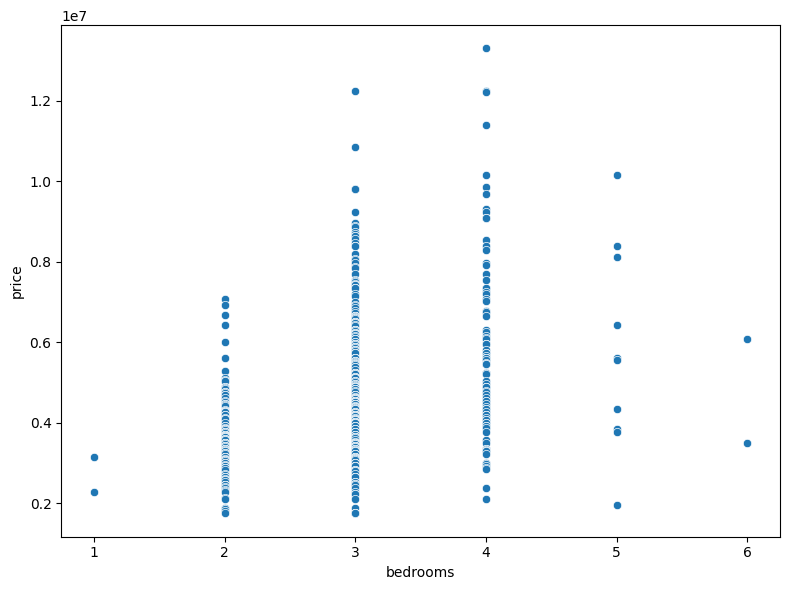

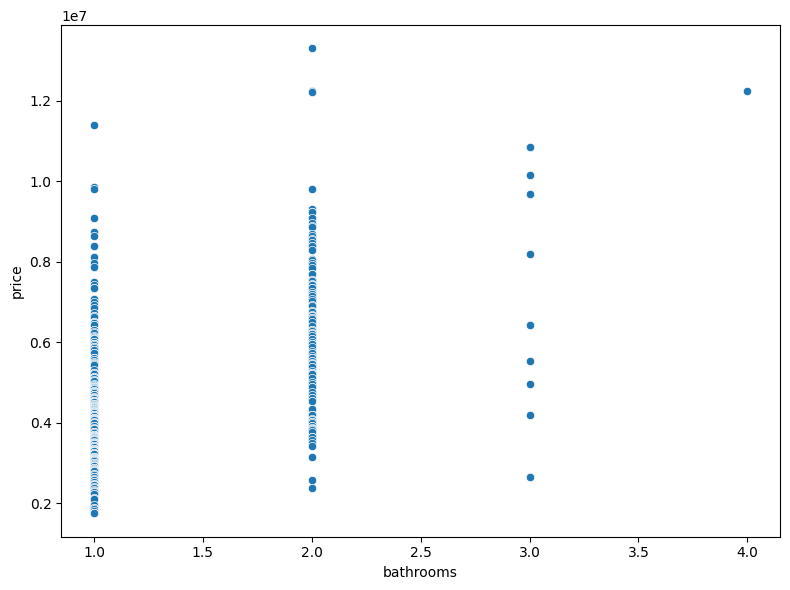

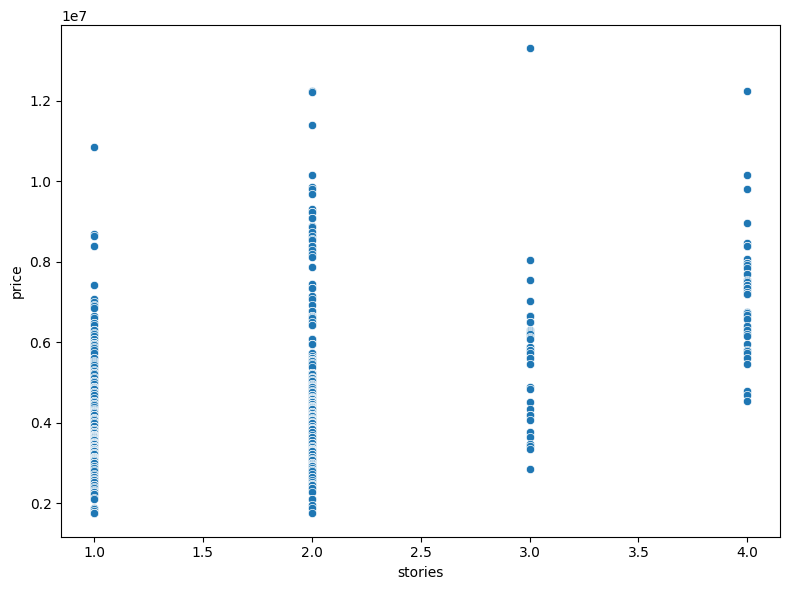

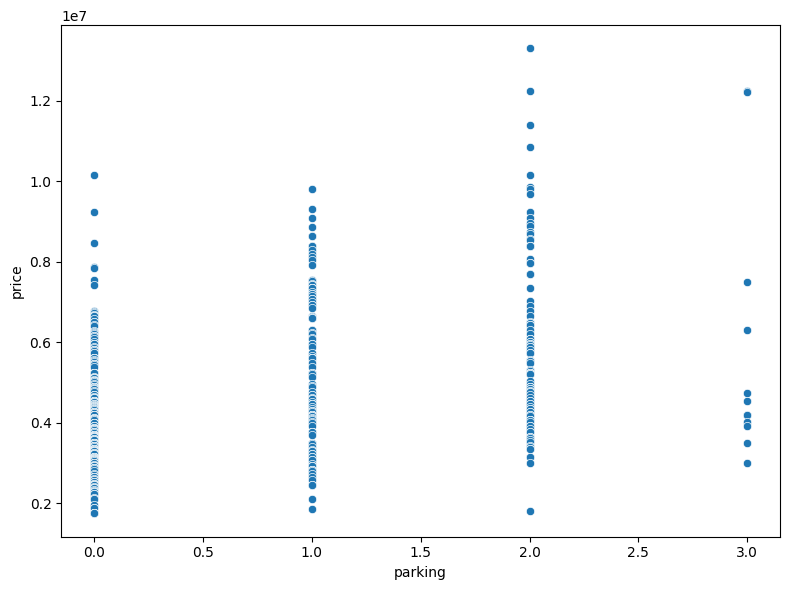

In [25]:
# Bivariate Analysis
# Scatter plots of numerical variables against the target variable (Price)
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='price', data=data)
    plt.xlabel(var)
    plt.ylabel('price')
    plt.tight_layout()
    plt.show()

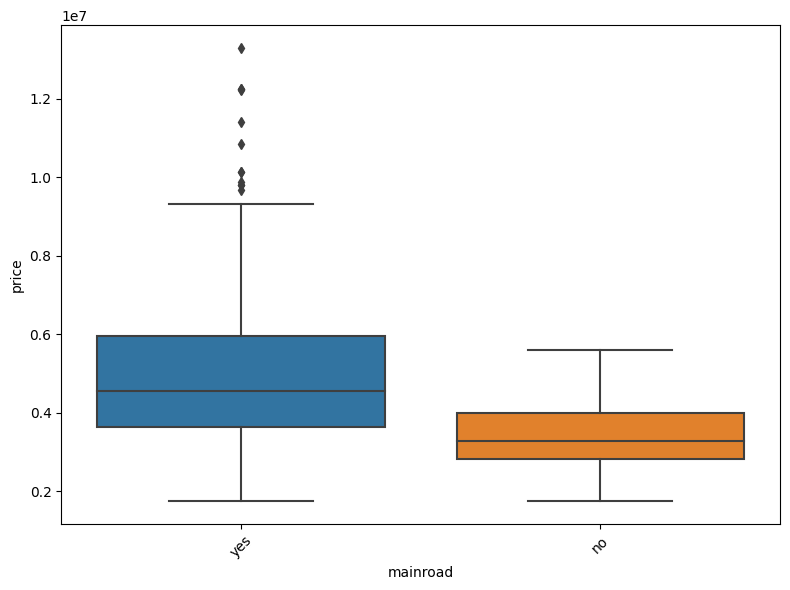

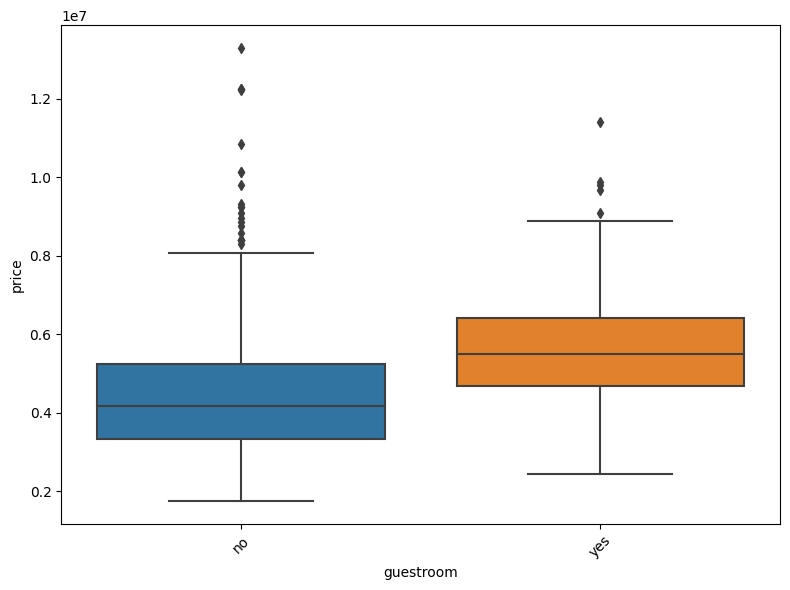

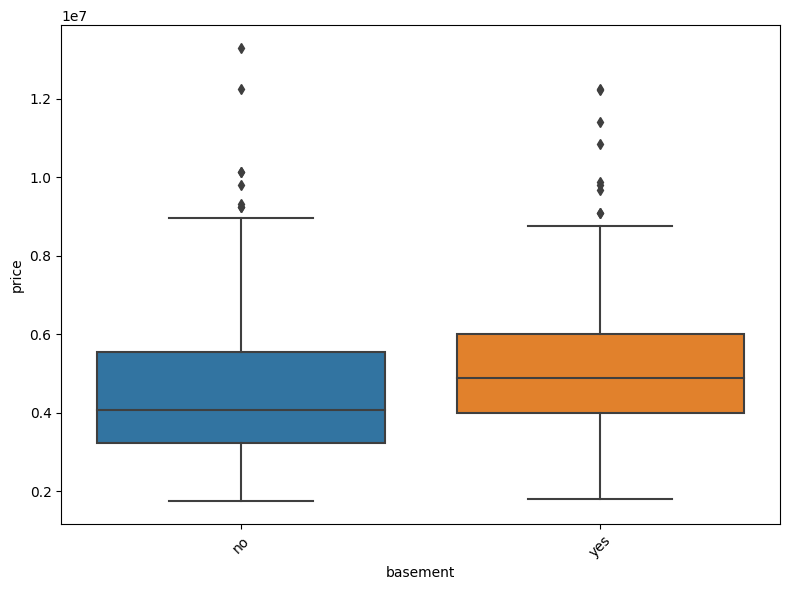

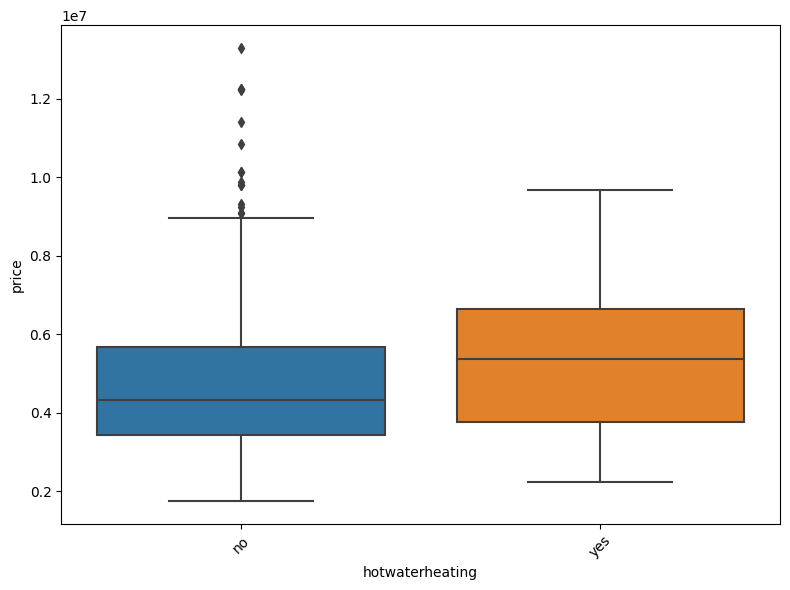

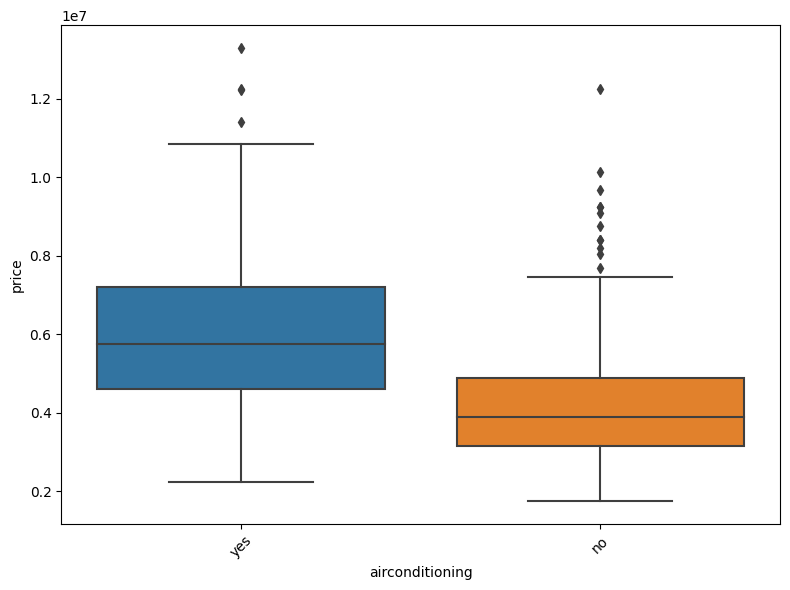

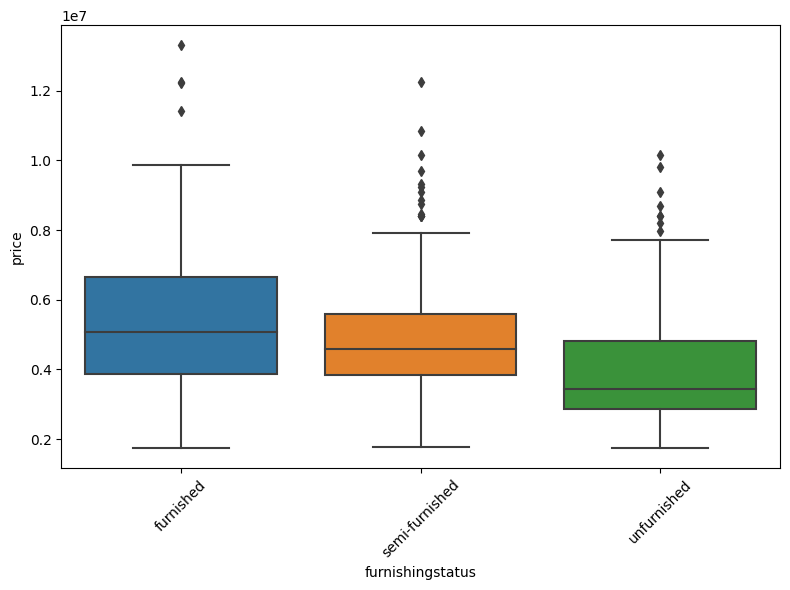

In [29]:
# Box plots of categorical variables against the target variable (Price)
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='price', data=data)
    plt.xlabel(var)
    plt.ylabel('price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

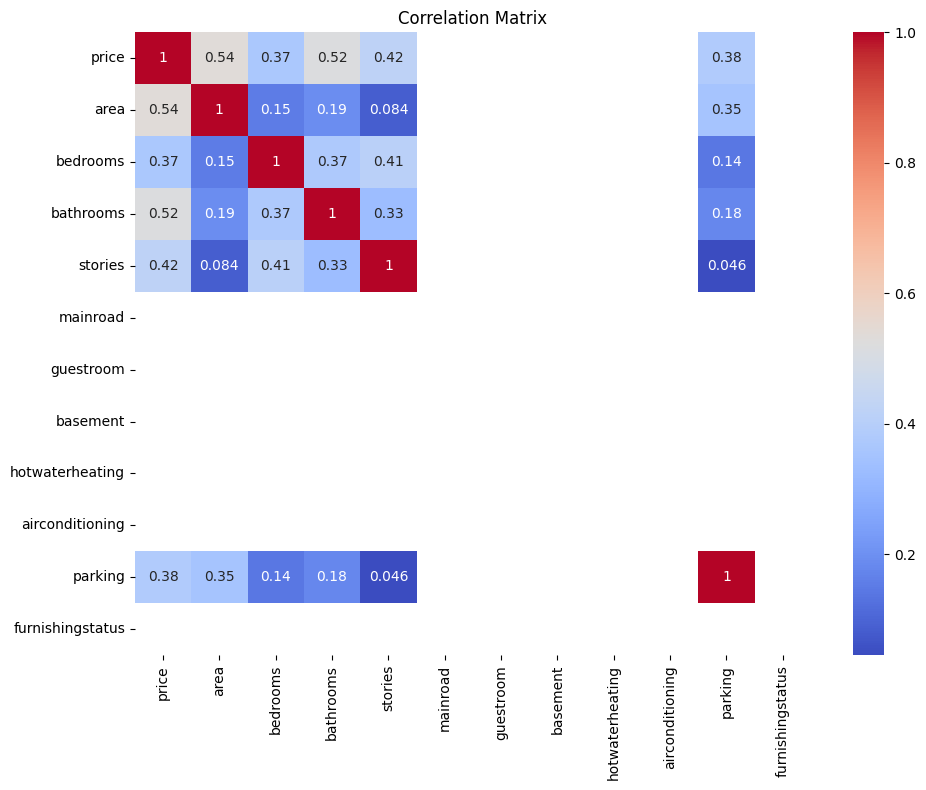

In [34]:
# Convert categorical columns to numeric format
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for col in categorical_cols:
    data[col] = data[col].map({'no': 0, 'yes': 1})

# Multivariate Analysis
# Heatmap of correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [36]:
missing_values = data.isnull().sum()
print(missing_values)

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking               0
furnishingstatus    545
dtype: int64


In [38]:
# Drop rows with missing values
data_without_missing = data.dropna()

In [40]:
# Calculate the IQR for each numerical column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)


In [42]:
# Replacing outliers with median
data_cleaned = data.copy()
data_cleaned[outliers] = data.median()

In [44]:
# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

In [46]:
# Split the data into features (X) and target variable (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the independent variables (X)
X_scaled = scaler.fit_transform(X)

In [50]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [59]:
# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1127483.3523235186
Mean Squared Error (MSE): 2292721545725.3613
Root Mean Squared Error (RMSE): 1514173.552049223
R-squared (R2) Score: 0.5464062355495873
